In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./SeoulBikeData.csv",encoding='unicode_escape')

In [3]:
(data.Date + "_" + (data.Hour).astype(str))

0        01/12/2017_0
1        01/12/2017_1
2        01/12/2017_2
3        01/12/2017_3
4        01/12/2017_4
            ...      
8755    30/11/2018_19
8756    30/11/2018_20
8757    30/11/2018_21
8758    30/11/2018_22
8759    30/11/2018_23
Length: 8760, dtype: object

In [4]:
#data['Unq_Idn'] = (data.Date + "_" + (data.Hour).astype(str))

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
data.Holiday = data.Holiday.map({ 'Holiday':1, 'No Holiday':0 })
data['Functioning Day'] = data['Functioning Day'].map({ 'Yes':1, 'No':0 })

In [7]:
for col in data.columns:
    print(col,data[col].nunique())

Date 365
Rented Bike Count 2166
Hour 24
Temperature(°C) 546
Humidity(%) 90
Wind speed (m/s) 65
Visibility (10m) 1789
Dew point temperature(°C) 556
Solar Radiation (MJ/m2) 345
Rainfall(mm) 61
Snowfall (cm) 51
Seasons 4
Holiday 2
Functioning Day 2


In [8]:
print(list(data.columns))

['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']


In [9]:
data = data.reset_index()

In [10]:
data = data.rename(columns = {
            'Rented Bike Count' : 'Bikes_Rented',
            'Temperature(°C)' : 'Temperature',
            'Humidity(%)' : 'Humidity',
            'Wind speed (m/s)' : 'Wind_Speed',
            'Visibility (10m)' : 'Visibility',
            'Dew point temperature(°C)':'Dew_Point',
            'Solar Radiation (MJ/m2)' : 'Solar_Radiation',
            'Rainfall(mm)':'Rainfall',
            'Snowfall (cm)':'Snowfall',
            'Seasons':'Season',
            'Holiday':'IsHoliday',
            'Functioning Day':'IsFunctioningDay',
            'index' : 'Id'            
        })

In [11]:
print(list(data.columns))

['Id', 'Date', 'Bikes_Rented', 'Hour', 'Temperature', 'Humidity', 'Wind_Speed', 'Visibility', 'Dew_Point', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Season', 'IsHoliday', 'IsFunctioningDay']


In [12]:
cols = ['Id', 'Date', 'Bikes_Rented', 'Hour', 'Temperature', 
        'Humidity', 'Wind_Speed', 'Visibility', 'Dew_Point',
        'Solar_Radiation', 'Rainfall', 'Snowfall', 'Season', 'IsHoliday', 'IsFunctioningDay']

new_cols = ['Id', 'Date', 'Hour', 'Temperature', 
            'Humidity', 'Wind_Speed', 'Visibility', 'Dew_Point',
            'Solar_Radiation', 'Rainfall', 'Snowfall', 'Season', 'IsHoliday', 'IsFunctioningDay', 'Bikes_Rented']

data = data[new_cols]

In [13]:
test = data.sample(1500,random_state=1)
test_indices = test.index
test = test.reset_index(drop=True)

train = data.drop(index=test_indices)
train = train.reset_index(drop=True)

In [14]:
submission_true = test[['Id','Bikes_Rented']]
test = test.drop(columns = 'Bikes_Rented')

## Previewing Train, Test, Subs

In [15]:
test.head()

,Id,Date,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point,Solar_Radiation,Rainfall,Snowfall,Season,IsHoliday,IsFunctioningDay
0,4136,22/05/2018,8,18.2,63,0.8,1731,11.0,1.00,0.0,0.0,Spring,1,1
1,6705,06/09/2018,9,23.5,72,0.5,1485,18.1,0.95,0.0,0.0,Autumn,0,1
2,3538,27/04/2018,10,15.3,50,1.0,944,4.9,1.97,0.0,0.0,Spring,0,1
3,6583,01/09/2018,7,21.1,81,1.0,1738,17.7,0.14,0.0,0.0,Autumn,0,1
4,1993,22/02/2018,1,-2.2,58,1.0,2000,-9.3,0.00,0.0,0.0,Winter,0,1


In [16]:
train.head()

,Id,Date,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point,Solar_Radiation,Rainfall,Snowfall,Season,IsHoliday,IsFunctioningDay,Bikes_Rented
0,0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,254
1,1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,204
2,2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,173
3,3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,107
4,4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,78


In [17]:
submission_true.head()

,Id,Bikes_Rented
0,4136,694
1,6705,1186
2,3538,789
3,6583,511
4,1993,190


In [50]:
submission_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id            1500 non-null   int64
 1   Bikes_Rented  1500 non-null   int64
dtypes: int64(2)
memory usage: 23.6 KB


## Checking Proper Distribution

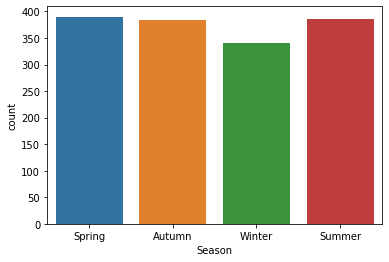

In [18]:
sns.countplot(test.Season)

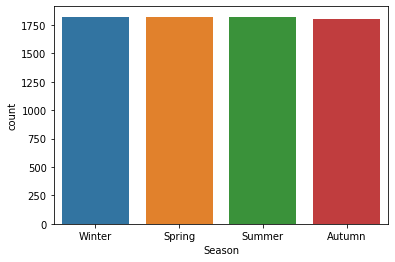

In [19]:
sns.countplot(train.Season)

## Creating Sample Submission

In [41]:
import random
copy_df = submission_true.copy()
true_vals =copy_df['Bikes_Rented']

'''random.shuffle(true_vals)
for i in range(len(true_vals)):
    true_vals[i] += random.uniform(10,20)
'''
sample_subs = pd.DataFrame({
    'Id' : copy_df['Id'],
    'Bikes_Rented' : [100 for i in range(len(copy_df['Bikes_Rented']))]
})

In [42]:
sample_subs.head()

,Id,Bikes_Rented
0,4136,100
1,6705,100
2,3538,100
3,6583,100
4,1993,100


In [43]:
error =[]
for s1,s2 in zip(submission_true['Bikes_Rented'],sample_subs['Bikes_Rented']):
    error.append(abs(s1 - s2))

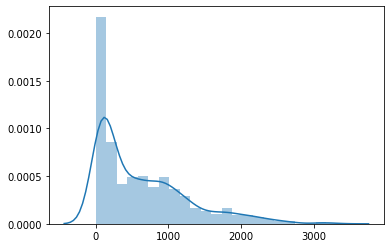

In [45]:
sns.distplot(error)

## Final Exporting

In [46]:
test.to_csv("./Competition_Data/test.csv",
            index=False,
            encoding = 'utf-8')

In [47]:
train.to_csv("./Competition_Data/train.csv",
            index=False,
            encoding = 'utf-8')

In [48]:
submission_true.to_csv("./Competition_Data/true_subs.csv",
                        index=False,
                        encoding = 'utf-8')

In [49]:
sample_subs.to_csv("./Competition_Data/sample_submission.csv",
                    index=False,
                    encoding = 'utf-8')

In [51]:
sample_subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id            1500 non-null   int64
 1   Bikes_Rented  1500 non-null   int64
dtypes: int64(2)
memory usage: 23.6 KB
